**Problem 3**

In [14]:
from scipy import fftpack
import numpy as np
import numpy.polynomial.chebyshev as cheb

import numpy as np
import matplotlib.pyplot as plt
plt.ion()

N_nodes = 5

#function to return the normalized coefficient for Cheb Poly of 1sd kind
#using the nodes from Cheby polys of 2nd kind
def chebcoeffs(f_vals):
    coeffs = fftpack.dct(f_vals[::-1], type=1)  #feeding the f_j in reverse order
    coeffs[0] *= 0.5
    coeffs[-1] *= 0.5
        
    coeffs = coeffs/(len(f_vals) - 1)  #normalizing by dividing by N_nodes-1
    
    return coeffs  #coefficients arranged from T_0 to T_N

#creating the polynomial
f_test = np.poly1d([8,4,2,1,1])

f_test_coeffs = np.array([5., 4., 5., 1., 1.])

#getting the nodes of chebyshev kind 2
nodes_cheb2 = cheb.chebpts2(N_nodes)

coeffs_calc = chebcoeffs(f_test(nodes_cheb2))

#testing if the coefficients are correct or not
test_truth = np.allclose(f_test_coeffs, coeffs_calc,atol=1e-10)

print('Expected Coefficients:', f_test_coeffs)
print('Computed Coefficients:', coeffs_calc)

print('Do they match?',test_truth)

Expected Coefficients: [5. 4. 5. 1. 1.]
Computed Coefficients: [5. 4. 5. 1. 1.]
Do they match? True


In [21]:
import time

f = lambda x: np.exp(-(x**2))

N_nodes = np.array([8, 2**13, 2**13 + 1, 2**17, 2**17 + 1])

for i in range(len(N_nodes)):
    nodes_cheb2 = cheb.chebpts2(N_nodes[i])
    coeffs_calc = chebcoeffs(f_test(nodes_cheb2))

    start = time.time()
    coeffs_calc = chebcoeffs(f_test(cheb.chebpts2(N_nodes[i])))
    end = time.time()
    print('Nodes = %E, Time = %E seconds'%(N_nodes[i],end - start))


Nodes = 8.000000E+00, Time = 2.212524E-04 seconds
Nodes = 8.192000E+03, Time = 1.115994E-01 seconds
Nodes = 8.193000E+03, Time = 4.823208E-04 seconds
Nodes = 1.310720E+05, Time = 2.824801E+01 seconds
Nodes = 1.310730E+05, Time = 5.985260E-03 seconds


Nodes = 1.025000E+03, Time = 4.169941E-04 seconds
Nodes = 4.097000E+03, Time = 5.397797E-04 seconds
Nodes = 1.638500E+04, Time = 2.296925E-03 seconds
Nodes = 6.553700E+04, Time = 9.124994E-03 seconds
Nodes = 2.621450E+05, Time = 2.797198E-02 seconds
Nodes = 1.048577E+06, Time = 8.337188E-02 seconds
Nodes = 4.194305E+06, Time = 3.655207E-01 seconds
Nodes = 1.677722E+07, Time = 3.366349E+00 seconds


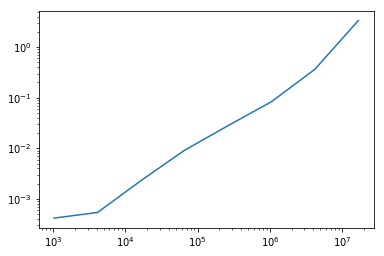

In [28]:
import time

f = lambda x: np.exp(-(x**2))

N_nodes = 2**(np.arange(10,26,2)) + 1

time_taken = np.zeros(len(N_nodes))

for i in range(len(N_nodes)):
    nodes_cheb2 = cheb.chebpts2(N_nodes[i])
    coeffs_calc = chebcoeffs(f_test(nodes_cheb2))

    start = time.time()
    coeffs_calc = chebcoeffs(f_test(cheb.chebpts2(N_nodes[i])))
    end = time.time()
    
    time_taken[i] = end - start
    
    print('Nodes = %E, Time = %E seconds'%(N_nodes[i],end - start))
    
plt.loglog(N_nodes,time_taken,'.')


array([ 1.06180238, 16.0220228 ])

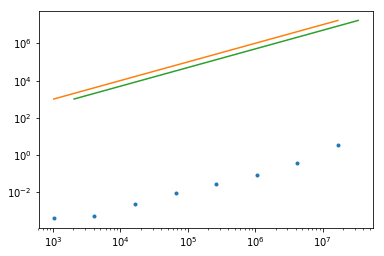

In [37]:
np.polyfit(np.log(time_taken), np.log(N_nodes),1)

Thus, we find that the linear polynomial fit gives us slope = 1.061 which is between 1 and 2. So, the scaling is somewhere between O($N$) and O($N^2$).